In [1]:
#This cell is tagged parameters for running this template using Papermill to inject values to overwrite these.
markdown = ""
section = 99
sub_pg = 99
end_nb = False
next_nb = ""


In [2]:
# Parameters
markdown = "\n# Part 22 of Recipes: Nature Cover Encode Diagram\n\nThis page is primarily based on the following page at the Circos documentation site:\n\n\n\n- [22. Nature Cover Encode Diagram](????????????)\n\n\n\nThat page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).\n\n\n\nGo back to Part 21 by clicking [here &#8592;](Recipes_Part21.ipynb).\n\n\n\n----\n\n\n\n8 --- Recipes\n=============\n\n22. Nature Cover Encode Diagram\n-------------------------------\n\n::: {#menu4}\n[[Lesson](/documentation/tutorials/recipes/nature_cover_encode/lesson){.clean}]{.active}\n[Images](/documentation/tutorials/recipes/nature_cover_encode/images){.normal}\n[Configuration](/documentation/tutorials/recipes/nature_cover_encode/configuration){.normal}\n:::\n\n[Nature\\'s special\nissue](http://www.nature.com/nature/journal/v489/n7414/index.html)\ndedicated to the [Encode Project](http://www.genome.gov/10005107) uses\nthe Circos motif on its\n[cover](http://www.nature.com/nature/journal/v489/n7414/index.html#about-the-cover)\nas well as the interactive [Encode\nExplorer](http://www.nature.com/encode/), which is available as an [app\nat iTunes](https://itunes.apple.com/app/id553487333).\n\nIn this tutorial, I\\'ll show you how to automatically generate the image\nthat appears on the cover. The original was created for Nature by [Carl\nDeTorres](http://www.carldetorres.com/).\n\n### image elements\n\nThe figure contains 23 segments --- these are human chromosomes 1--22\nand chromosome X. The proportions in the figure aren\\'t exactly the same\nas the lengths of the assembled chromosomes in the hg19 human assembly.\nHere, we\\'ll use the assembled lengths.\n\nThe color scheme used is is a pleasant range of pastel hues that cycle\nthrough orange, green, blue and purple. We\\'ll redefine the default\nchromosome colors to make use of this color scheme.\n\nThe data in the figure is shown in six concentric tracks, whose spacing\ndecreases slightly towards the inside of the circle. Each track appears\nto highlight fixed-width regions, colored after the chromosome color\nscheme. I don\\'t know how the data tracks were populated, whether the\ndata are randomly placed, designed for visual effect, or drawn from an\nactual Encode data set. In this example, we\\'ll create the tracks using\na random scheme.\n\n### color scheme\n\nI sampled the RGB colors from the cover image and obtained the following\nvalues, which I\\'ve placed in a [\\<colors\\>]{.syn-block} block. The `*`\nsuffix overrides existing color definitions.\n\n    # circos.conf\n    <<include etc/colors_fonts_patterns.conf>>\n    <colors>\n    chr1*  = 163,132,130\n    chr2*  = 188,162,118\n    chr3*  = 216,196,96\n    chr4*  = 233,212,56\n    chr5*  = 229,229,50\n    chr6*  = 212,222,56\n    chr7*  = 195,215,57\n    chr8*  = 177,209,58\n    chr9*  = 160,204,61\n    chr10* = 139,198,61\n    chr11* = 128,193,95\n    chr12* = 115,186,126\n    chr13* = 102,183,152\n    chr14* = 91,178,176\n    chr15* = 61,174,199\n    chr16* = 36,170,224\n    chr17* = 75,129,194\n    chr18* = 85,111,180\n    chr19* = 92,92,168\n    chr20* = 98,70,156\n    chr21* = 101,45,145\n    chr22* = 121,74,141\n    chrx*  = 140,104,137\n    </colors>\n\nThe background of the image is set in the [\\<image\\>]{.syn-block} block.\nThe `*` suffix is used to overwrite values of parameters set elsewhere\nin the block (e.g., here defined in the included file `etc/image.conf`).\n\n    <image>\n    <<include etc/image.conf>>\n    background* = black\n    </image>\n\n### track positions\n\nEach track has the same data source but has a different appearance\nbecause of dynamic rules that alter the data randomly.\n\nThe definition of each track is actually the same, but includes\ndynamically changing fields called counters that change the position of\neach track. The figure with 7 tracks is created like this\n\n\n    # variables used in each plot.conf block\n\n    plot_width   = 80 \n    plot_padding = 25 \n    num_plots    = 6  \n\n    <plots>\n    type             = highlight\n    file             = bins.txt\n    stroke_thickness = 0\n    <<include plot.conf>>\n    <<include plot.conf>>\n    <<include plot.conf>>\n    <<include plot.conf>>\n    <<include plot.conf>>\n    <<include plot.conf>>\n    <<include plot.conf>>\n    </plots>\n\nwhere the `plot.conf` file is\n\n    <plot>\n    r1   = dims(ideogram,radius_inner)\n             - conf(plot_padding)*eval(remap(counter(plot),0,conf(num_plots),1,0.9))\n             - eval((conf(plot_width)+conf(plot_padding))*counter(plot)*eval(remap(counter(plot),0,conf(num_plots),1,0.9)))\n    r0   = conf(.,r1)\n             - conf(plot_width)*eval(remap(counter(plot),0,conf(num_plots),1,0.9))\n    post_increment_counter = plot:1\n    <<include rules.conf>>\n    </plot>\n\nThe inner and outer radii of the the track (`r0` and `r1`) are computed\nusing the value of the `plot_padding` and `plot_width` parameters. Each\ntime a plot is drawn, the value of the variable `counter(plot`) is\nincremented by 1.\n\nThe `dims(ideogram,radius_inner`) variable refers to the position of the\ninner radius of the ideograms. The function\n`remap(VAR,MIN,MAX,TARGETMIN,TARGETMAX`) is used to remap the variable\n`VAR` from the range `[MIN,MAX]` to `[TARGETMIN,TARGETMAX]`. The\nexpressions are designed so that the spacing between the tracks\ndecreases slightly towards the center of the circle, to match the\nappearance of the original image in Nature.\n\n### track data\n\nEach track uses the same data file, `bins.txt`. How is it that the\ntracks look different, then?\n\nThe data file defines 7.5 Mb bins across the genome\n\n    hs1 0 7499999\n    hs1 7500000 14999999\n    hs1 15000000 22499999\n    hs1 22500000 29999999\n    ...\n\nand the color associated with each bin is dynamically altered by rules\nthat are included in each [\\<plot\\>]{.syn-block} block, from the file\n`rules.conf`.\n\n    # rules.conf\n    <rules>\n\n    <rule>\n\n    # Rules with multiple condition \n\n    # The first condition tests that bins are further than 5 Mb from the\n    # start and end of each ideogram.  This ensures that the color\n    # for the first/last bin will be the same as the ideogram.\n\n    condition  = var(start) >= 5e6 && var(end) < chrlen(var(chr))-5e6\n\n    # The probability that the second condition is true is proportional to\n    # the track counter. Bins in inner tracks are more likely to trigger\n    # this rule.  Here, rand() is a uniformly distributed random number in\n    # the range [0,1).\n\n    condition  = rand() < remap(counter(plot),0,conf(num_plots)-1,1/conf(num_plots),1) \n\n    # If this rule is true, the color of the bin is changed to that of a\n    # random ideogram.\n\n    fill_color = eval(\"chr\" . (sort {rand() <=> rand()} (1..22,\"x\"))[0])\n\n    </rule>\n\n    # If the above rule is not true, the color of the bin is assigned to\n    # that of its ideogram.\n\n    <rule>\n    condition  = 1\n    fill_color = eval(\"chr\" . lc substr(var(chr),2))\n    </rule>\n    </rules>\n\nThis is an advanced technique---one meant for designing illustrations\nmore than for the display of data. However, next time you\\'re in the\nneed of random circular heatmaps, give it a try.\n\n"
section = 8
sub_pg = 22
end_nb = False
next_nb = "Recipes_Part23.ipynb"


In [3]:
'''from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd(markdown)'''
print(markdown) #use this because want to be able to edit the markdown and rendering it with `printmd` diables that


# Part 22 of Recipes: Nature Cover Encode Diagram

This page is primarily based on the following page at the Circos documentation site:



- [22. Nature Cover Encode Diagram](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 21 by clicking [here &#8592;](Recipes_Part21.ipynb).



----



8 --- Recipes

22. Nature Cover Encode Diagram
-------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/nature_cover_encode/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/nature_cover_encode/images){.normal}
[Configuration](/documentation/tutorials/recipes/nature_cover_encode/configuration){.normal}
:::

[Nature\'s special
issue](http://www.nature.com/nature/journal/v489/n7414/index.html)
dedicated to the [Encode Project](http://www.genome.gov/10005107) us



----

### Generating the plot produced by this example code

The following two cells will generate the plot. The first cell adjusts the current working directory.

In [4]:
%cd ../circos-tutorials-0.67/tutorials/{section}/{sub_pg}/

/home/jovyan/circos-tutorials-0.67/tutorials/8/22


In [5]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.20s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.20s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/22
debuggroup summary 0.20s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.20s loading configuration from file circos.conf
debuggroup summary 0.20s found conf file circos.conf
debuggroup summary 0.38s debug will appear for these features: output,summary
debuggroup summary 0.38s bitmap output image ./circos.png
debuggroup summary 0.38s SVG output image ./circos.svg
debuggroup summary 0.38s parsing karyotype and organizing ideograms
debuggroup summary 0.47s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.48s applying global and local scaling
debuggroup summary 0.49s allocating image, colors and brushes
debuggroup summary 2.10s drawing 23 ideograms of total size 3,036,303,869
debuggroup summary 2.10s drawing highlights and ideograms
debuggroup sum

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized val

View the plot in this page using the following cell.

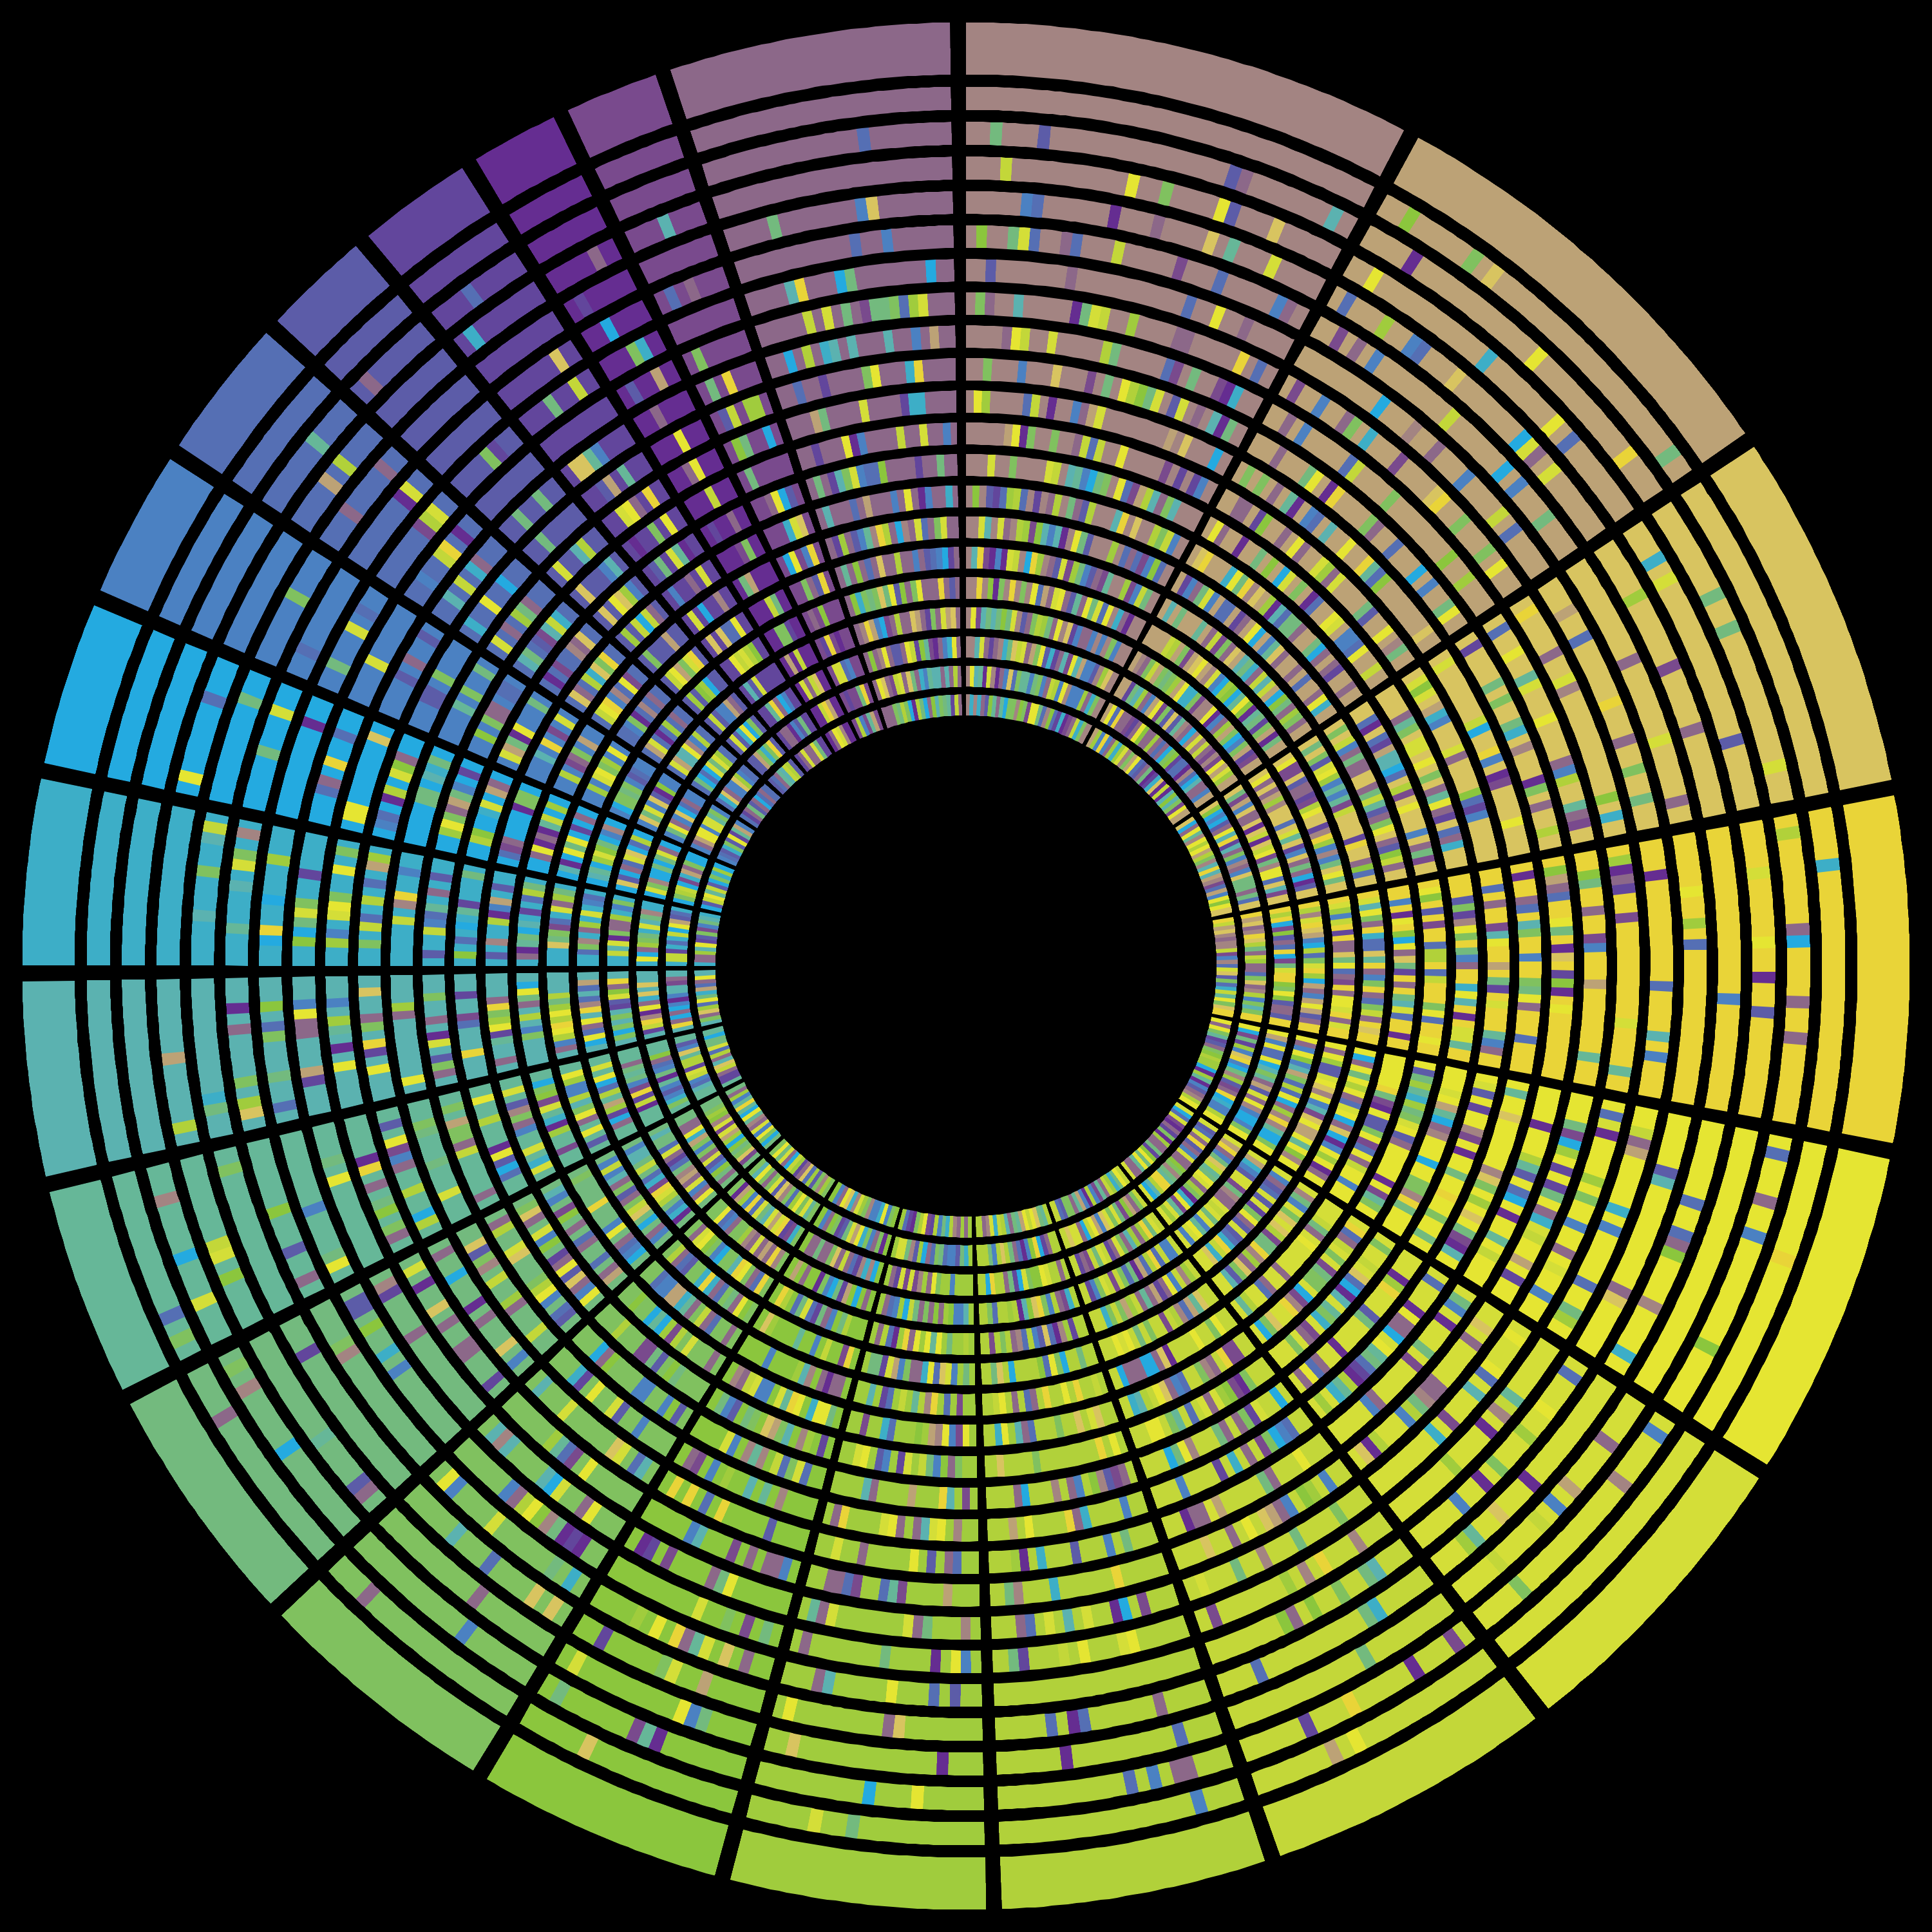

In [6]:
from IPython.display import Image
Image("circos.png")

----

In [7]:
next_md = ("Continue on to the next part of the Quick Start series by clicking [here &#10145;]({})</font>.".format(next_nb))
if end_nb:
    next_md = ("End of tutorials.")
#printmd(next_md)
print(next_md) #use this because want to be able to edit the markdown and rendering it with `printmd` diables that

Continue on to the next part of the Quick Start series by clicking [here &#10145;](Recipes_Part23.ipynb)</font>.


----